# Visualization with python Library

Reference(참고 문서) : [@zzsza's blog](https://zzsza.github.io/development/2018/08/24/data-visualization-in-python/)

- Python에서 데이터 시각화를 할때 다양한 라이브러리를 사용한다.
- Library list
    - `matplotlib`
    
    - `seaborn`
    
    - `plotnine`
    
    - `folium`
    
    - `plot.ly`
    
    - `pyecharts`
 

## Matplotlib
---
- `pandas`의 DataFrame을 바로 시각화 할 때도 내부적으로 `matplotlib`을 사용합니다.
- 설치
```zsh
pip3 install matplotlib
```
- 공식 튜토리얼 문서 :  [Matplotlib Tutorials](https://matplotlib.org/tutorials/index.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.2.2


### Figure
- `Figure`은 **그림이 그려지는 도화지**라고 생각
    - `Figure` 생성 --> `plt.subplots`로 도화지를 분할해 각 부분에 그래프를 그리는 방식
    
    - `plt.figure` 를 명시적으로 표현해주는 것이 좋지만, **보통 plot함수에서 자동으로 `figure`를 생성해주기 때분에 자주 사용하진 않는다.**
    
    - 현재 `figure`에 접근 할 필요성이 있다면, `plt.gcf()`로 접근 가능
    
    
- size 조절 --> `fig.set_size_inches(18.5, 10.5)`
    - `plt.figure(figsize = (10, 5)`
    
    - `plt.rcParams['figure.figsize'] = (10, 7)`
    
### Axes
- `Axes`는 plot이 그려지는 공간

### Axis
- plot의 축

### Examples
#### figure, axes 직접 설정하는 경우

<Figure size 432x288 with 0 Axes>

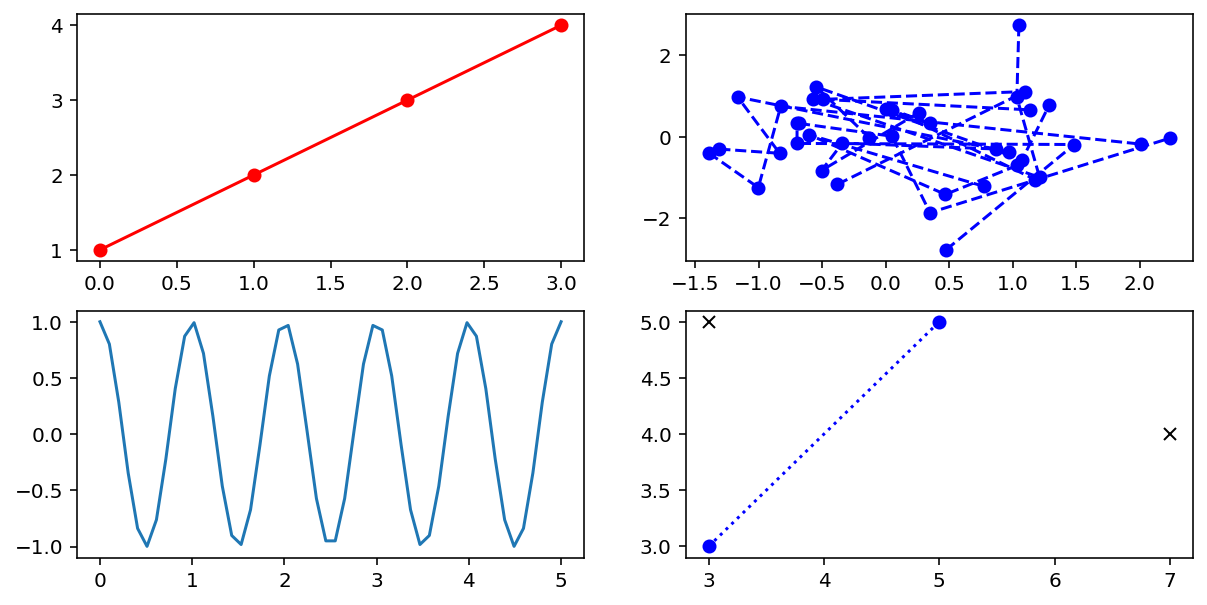

In [2]:
# figure 설정.
fig = plt.figure()

# figure (전체) 크기 설정, axes 개수 설정.
fig, ax_lst = plt.subplots(2, 2, figsize=(10,5))

# ax_lst[행][열]에 원하는 그림을 그려줄 수 있음.
ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')

# 지금까지 그린 그림을 보여줌.
plt.show()


#### pandas.DataFrame을 바로 시각화 하는 경우



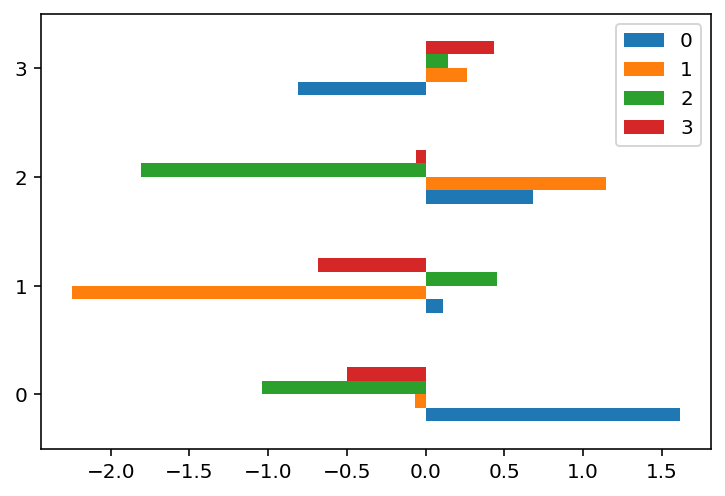

In [3]:
# pandas.DataFrame 생성
df = pd.DataFrame(np.random.randn(4,4))

# pandas.DataFrame 에서 바로 Matplotlib 사용
df.plot(kind='barh')

#### [R] 라이브러리 `ggplot` 스타일로 그리는 방법
아래의 옵션 추가

참고: 
`ggplot`뿐만아니라 `print(plt.style.available)` 을 통해 원하는 스타일을 변경할 수 있다.

In [4]:
plt.style.use('ggplot')

# for matplotlib version 1.3 or lower,
#pd.options.display.mpl_style = 'default'

<Figure size 432x288 with 0 Axes>

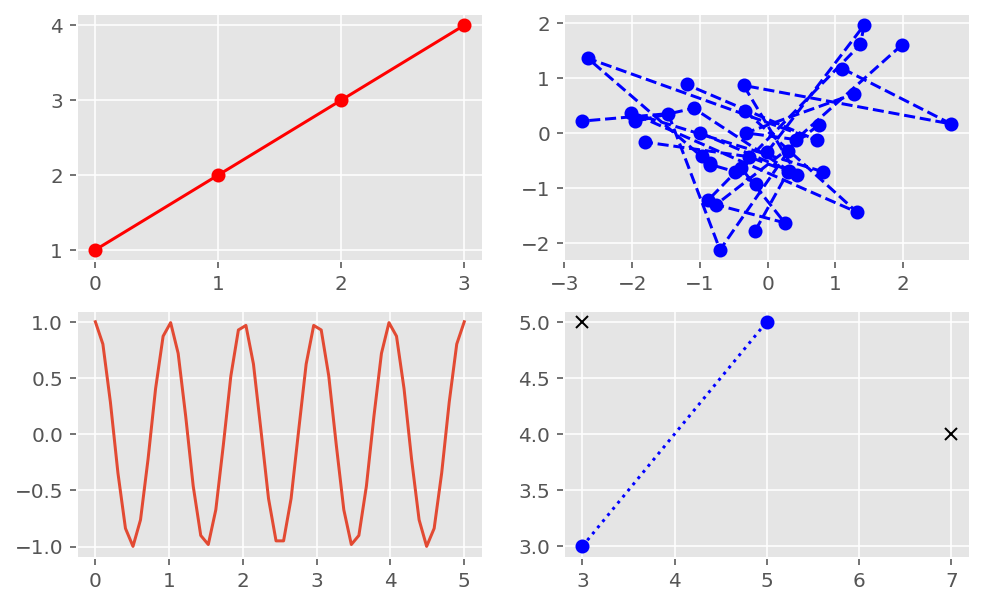

In [5]:
fig = plt.figure()
fig.suptitle('ggplot style')

fig, ax_lst = plt.subplots(2, 2, figsize=(8,5))

ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')
plt.show()

## Seaborn
---
- `seaborn` is **based** on, and **dependent** on `Matplotlib`
    + 색 테마
    + 차트   
        ...와 같은 기능 추가
        

- `Matplotlib`에 없는 그래프등을 가지고 있다.
    - 히트맵
    - 카운터플랏
        ... 등등
        
- 설치
```
pip3 install seaborn
```

- 공식 튜토리얼 문서 :  [Seaborn Tutorials](https://seaborn.pydata.org/tutorial.html)


In [6]:
import seaborn as sns
print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.10.1


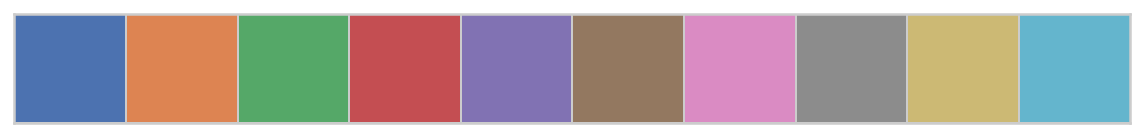

In [7]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

### replot
- **x :** x 축에 들어갈 데이터의 data의 column name    
- **y :** y 축에 들어갈 데이터의 data의 column name  
- **hue, size, style:**   
    data의 column name이 들어가고(**Categorical variable**로 인식),   
    각각 점의 **색상, 크기, 모양**을 지정해준 카테고리별로 다르게 표현해준다.
    
    
- **row, col :**  
    data의 column name이 들어가고(**Categorical variable**로 인식),  
    각각 행, 열의 방향으로 지정해준 data의 column name을 기준으로 카테고리 별로 데이터를 구분해준다.
    
- **kind :** 어떤 plot을 그릴지 표기,  
    Options are:
    + 'scatter' :  **(default)**
    + 'line'

- **height :** 한 면의 높이(height of a facet)에 해당하는 값을 지정
- **aspect :** 한 면의 높이에 지정해준 비율만큼 곱한 값을 너비의 길이로 설정.  
    width size = height*aspect

- **data** : data

In [8]:
# Seaborn 내장 데이터 호출
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


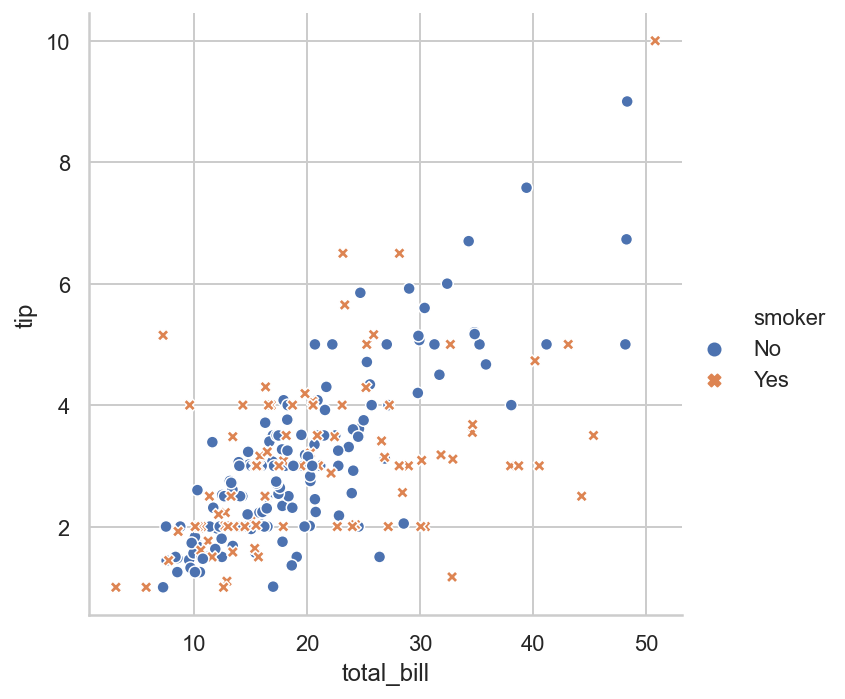

In [9]:
# replot 함수 사용 예제
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips)

In [10]:
# 데이터 생성: 두 가지 변수 --> 'time', 'value'
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))

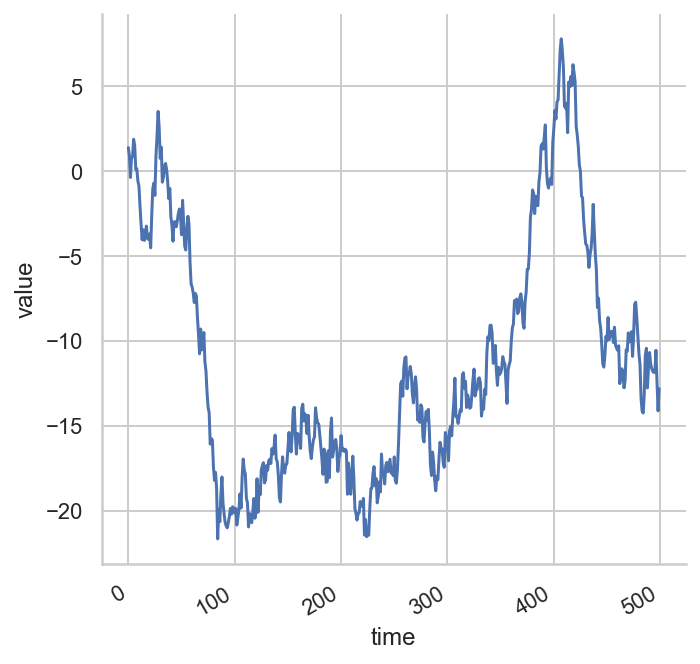

In [11]:
# 
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

### Catplot
- **kind :** 어떤 plot을 그릴지 표기,  
    Options are:
    + 'point'
    + 'bar'
    + 'strip'
    + 'swarm'
    + 'box'
    + 'violin'
    + 'boxen'
    
- **orient :** 범주별로 쌓이는 데이터의 방향
    - v : (vertical,**default**) 세로방향
    - h : (horizontal) 가로방향

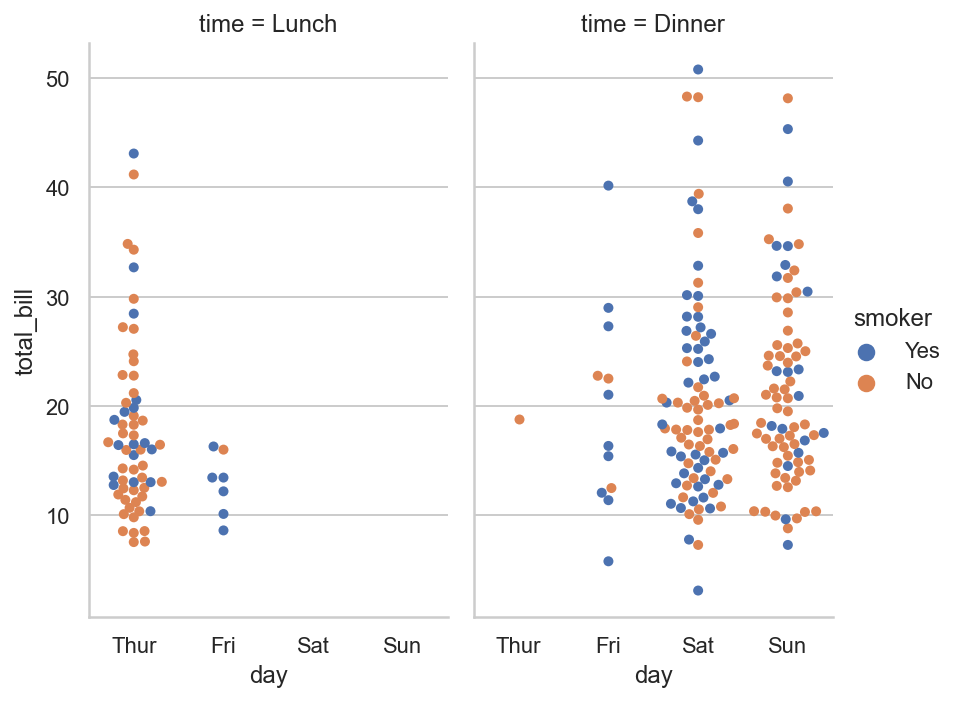

In [12]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips)

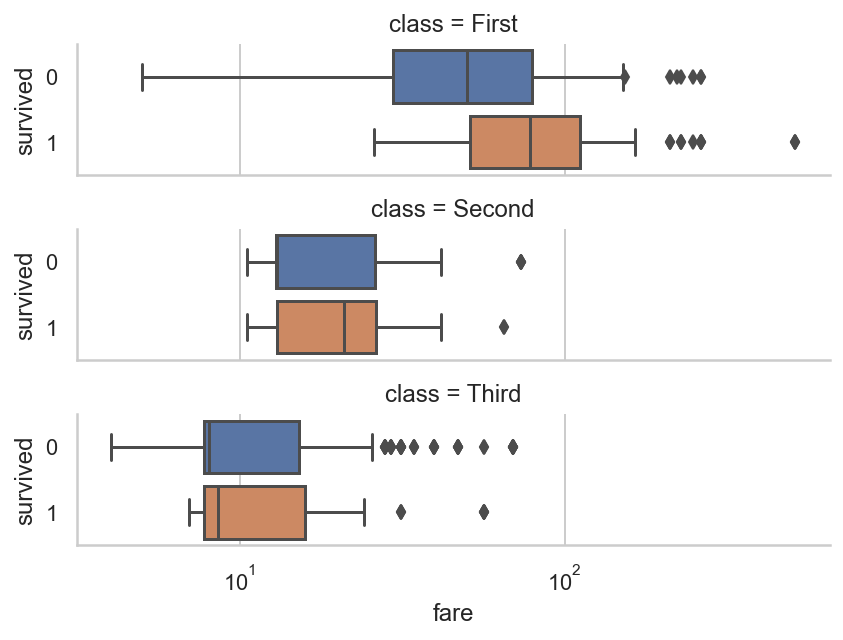

In [13]:
# 데이터 입력
titanic = sns.load_dataset("titanic")

# catplot-box
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log")

### Pairplot

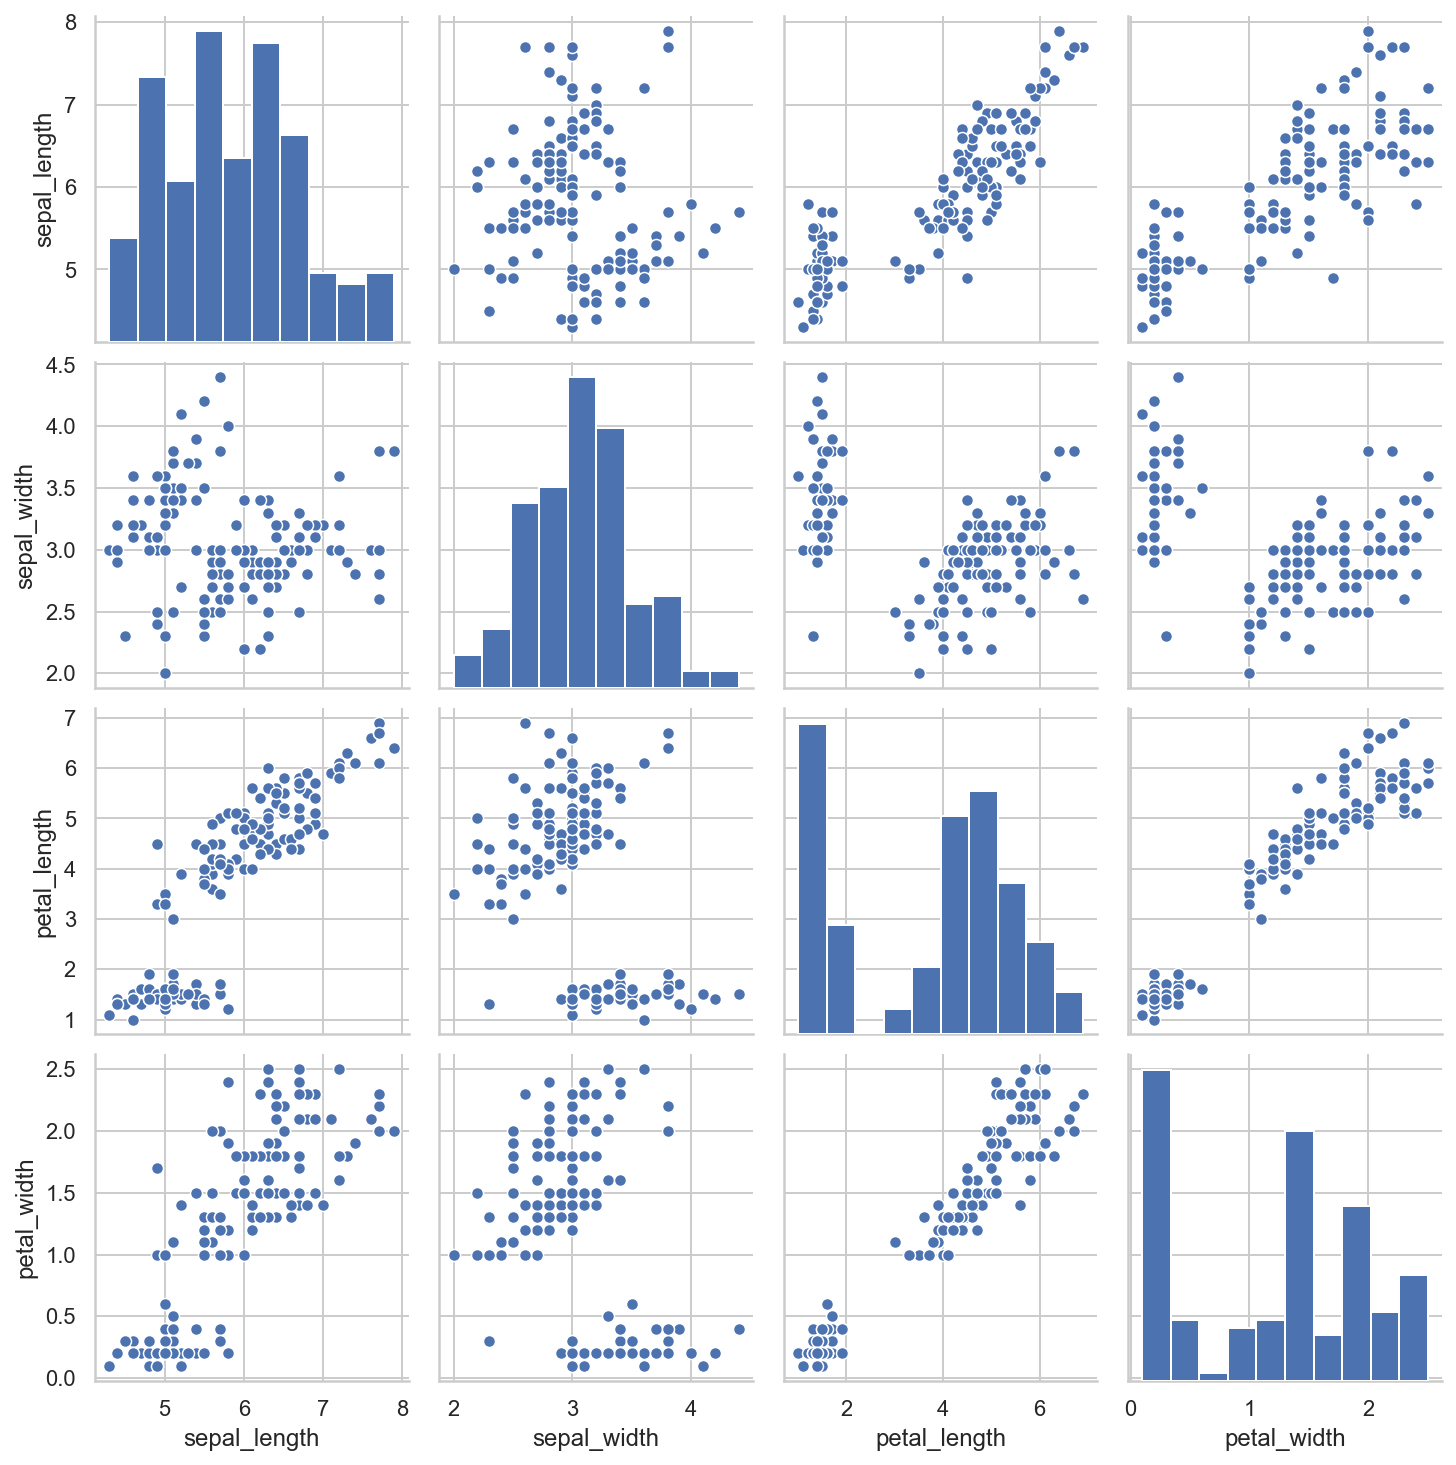

In [14]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

#### seaborn.PairGrid( )
[seaborn.pydata.org > **PairGrid**](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)
- seaborn.pairplot()보다 유연한 옵션을 조절할 수 있다.
- 화면상에 나타내야하는 격자 Axes를 불러오게한다.
- Parameters
    - hue :  
        그래프에 각각 어떤 범주형 변수의 카테로리고 구분하고 싶은면 해당 변수를 입력해준다. 전체에서 제외된다.


- Attributes
    - PariGrid.map()    
        그리고 싶은 plot을 입력하면 각각에 해당하는 이변량 그래프를 그려준다.
    - PairGrid.map_diag()
    - PairGrid.map_offdiag()  
        대각원소와 비대각원소에 원하는 plot의 형태를 다르게 지정해주려면 위의 함수를 입력시켜주면 된다.
    - PairGrid.map_upper()
    - PairGrid.map_lower()  
        비대각원소 중 위 원소들과 아래 원소들에 각각 다른 plot을 표시할 수 도 있다.
    - PairGrid.add_legend()  
        구분된 범주의 색상을 표시해준다.

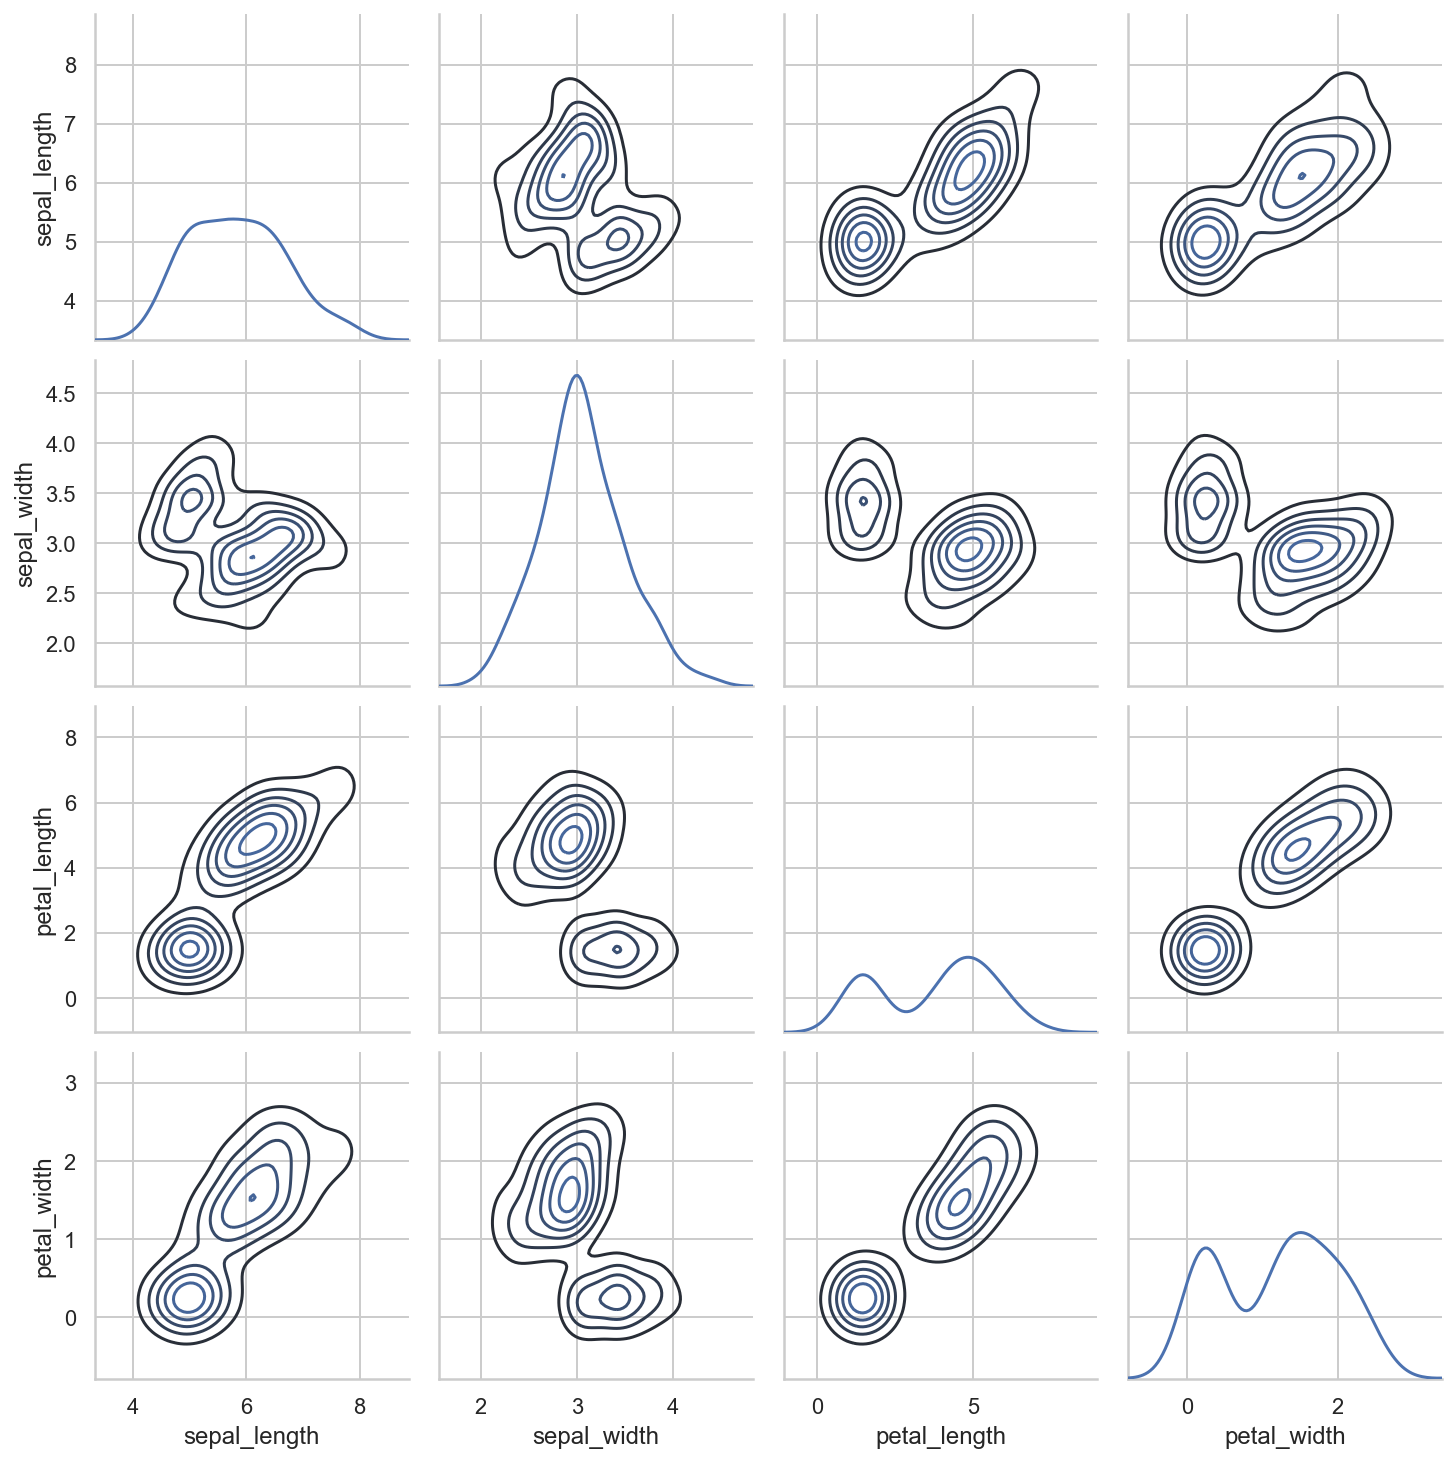

In [15]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

### Heatmap

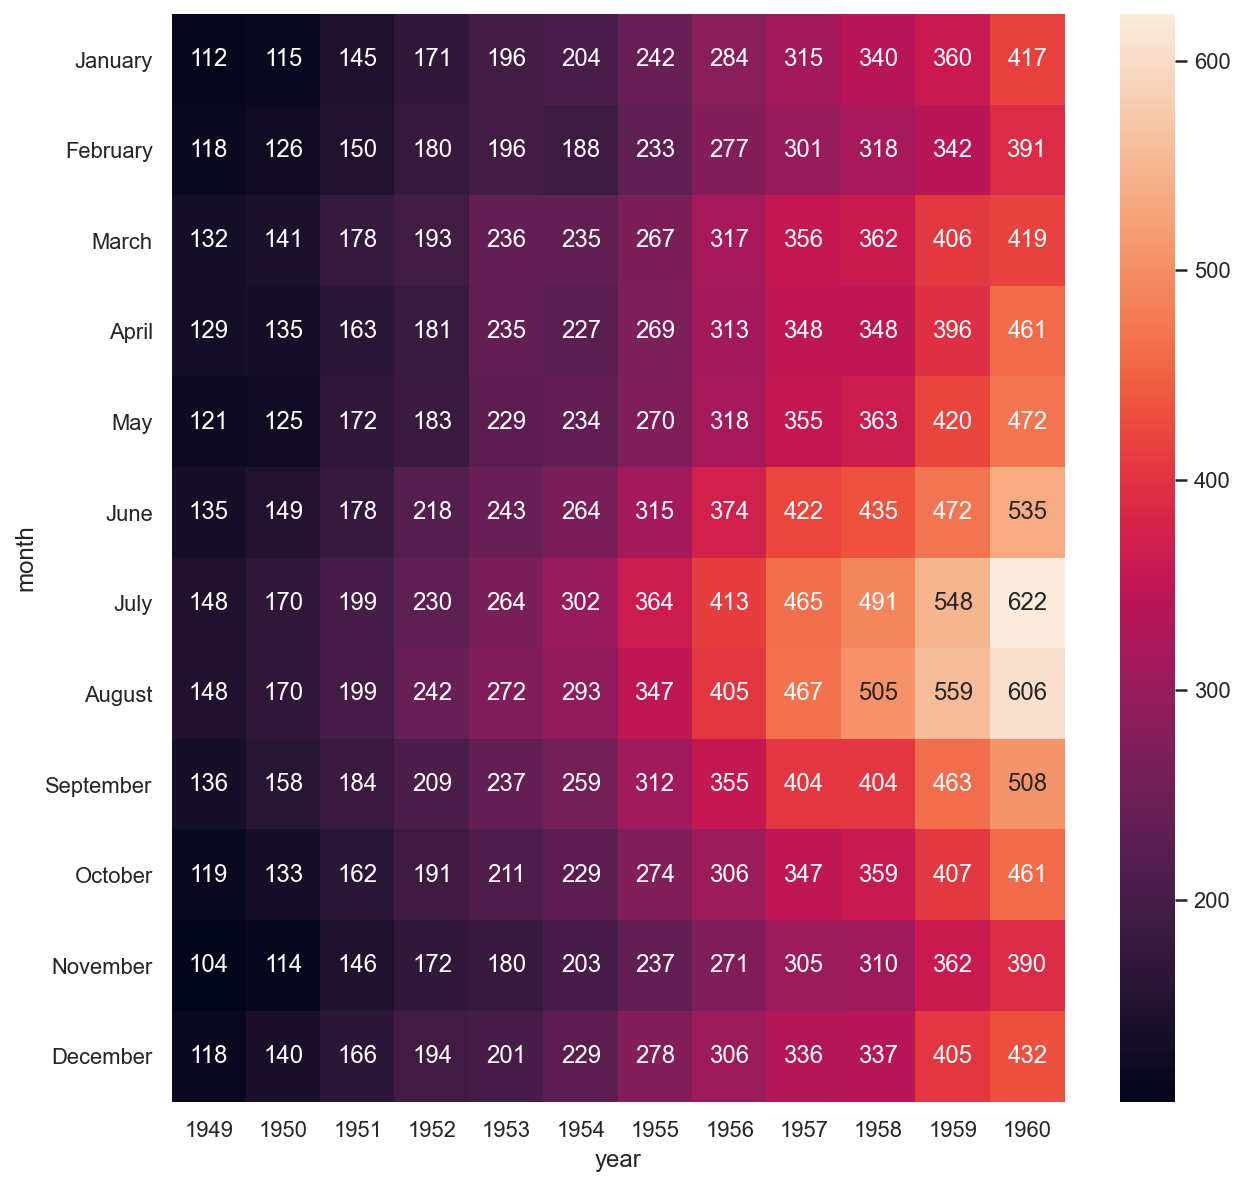

In [16]:
# 데이터 불러오기
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

plt.figure(figsize=(10, 10))
ax = sns.heatmap(flights, annot=True, fmt="d")

## Plotline
---
- R의 ggplot2 패키지에 기반하여 그래프를 그리는 라이브러리
- [공식문서](https://plotnine.readthedocs.io/en/stable/)
- 설치
```zsh
pip3 install plotnine
```

In [17]:
import plotnine
from plotnine import *
print("plontnine version :",plotnine.__version__)

plontnine version : 0.7.1


In [18]:
# 데이터 생성
n = 10
df = pd.DataFrame({'x': np.arange(n),
                   'y': np.arange(n),
                   'yfit': np.arange(n) + np.tile([-.2, .2], n//2),
                   'cat': ['a', 'b']*(n//2)})

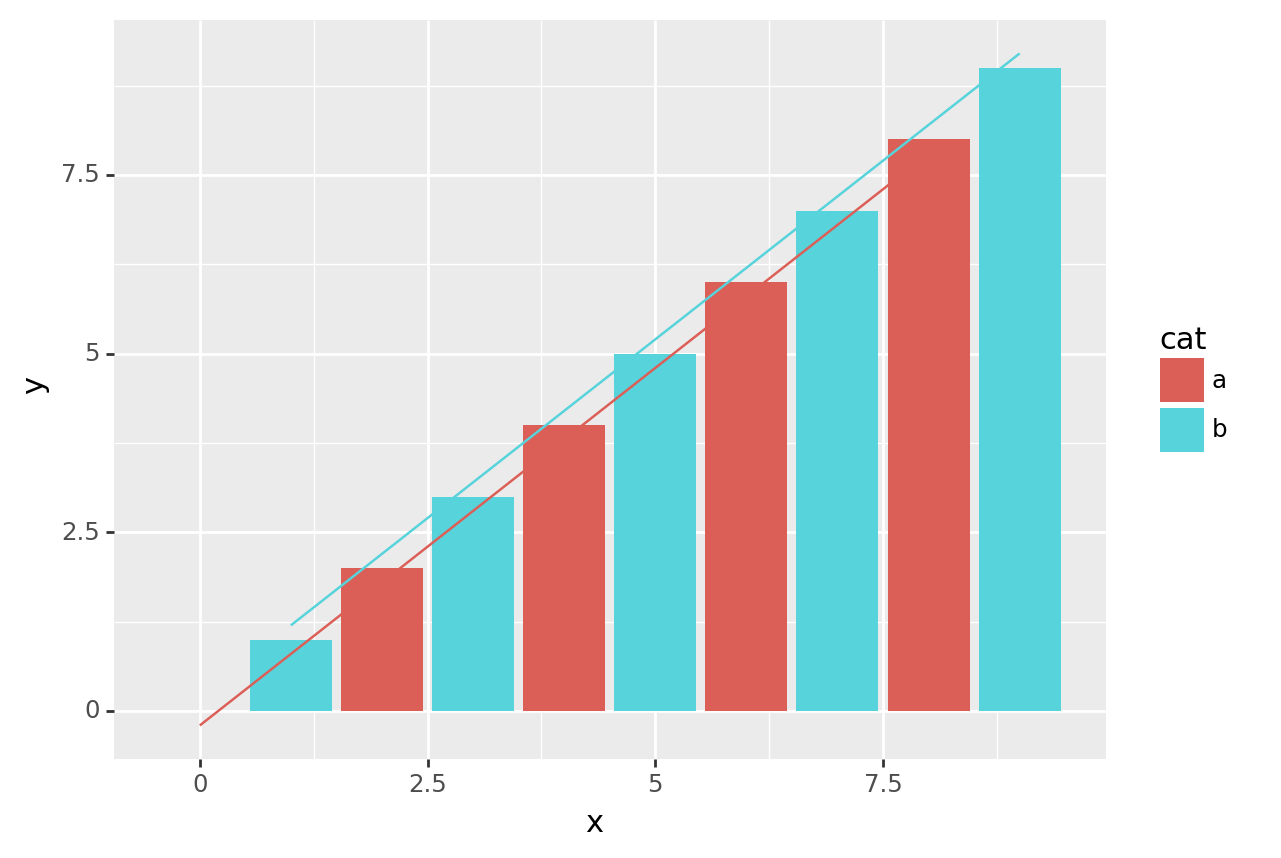

<ggplot: (8762876922155)>

In [19]:
(ggplot(df)    
 + geom_col(aes('x', 'y', fill='cat'))
 + geom_path(aes('x', y='yfit', color='cat'))
)

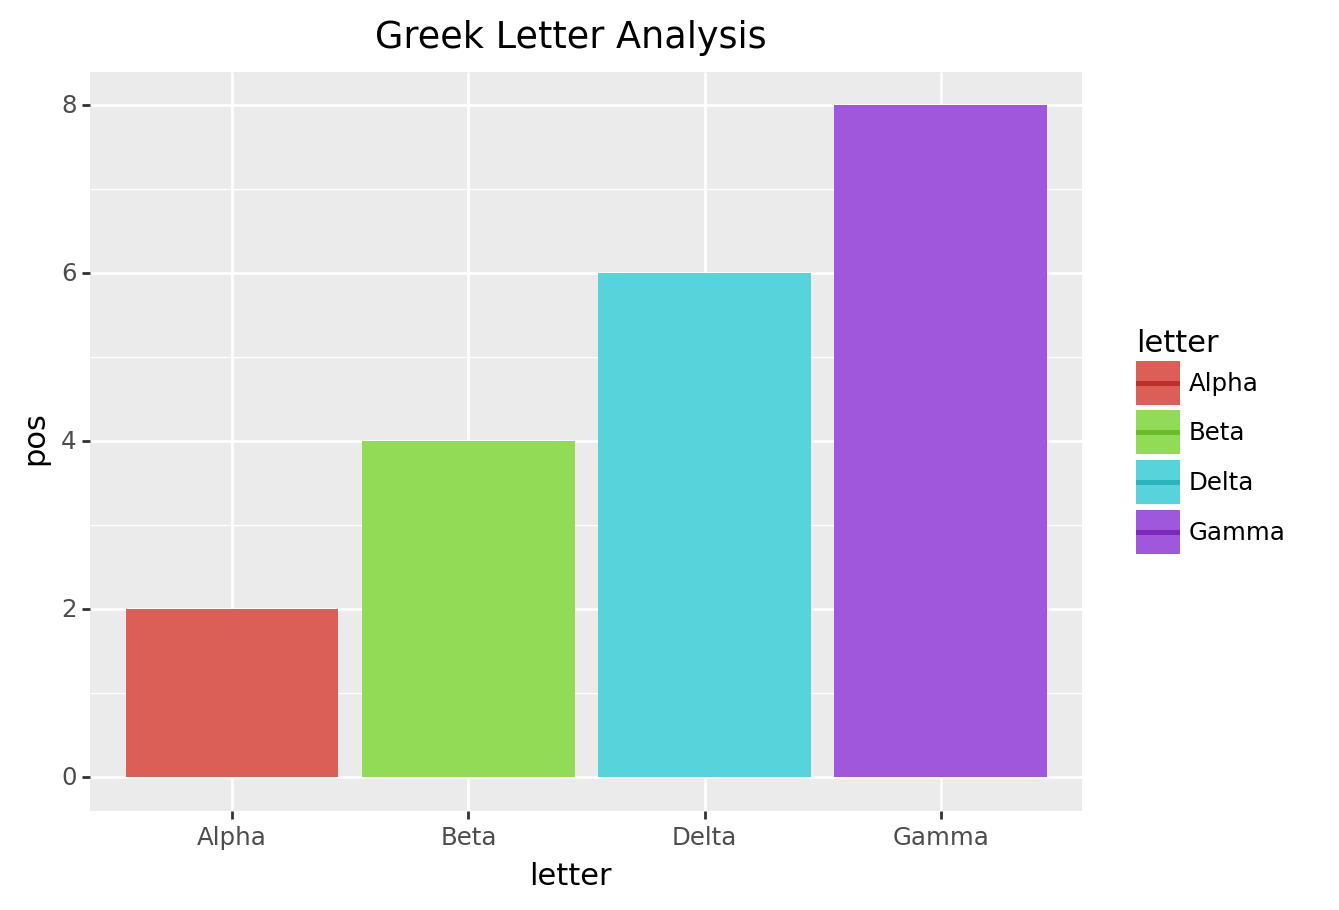

<ggplot: (8762876972210)>

In [20]:
df2 = pd.DataFrame({
    'letter': ['Alpha', 'Beta', 'Delta', 'Gamma'] * 2,
    'pos': [1, 2, 3, 4] * 2,
    'num_of_letters': [5, 4, 5, 5] * 2
})

(ggplot(df2)
 + geom_col(aes(x='letter',y='pos', fill='letter'))
 + geom_line(aes(x='letter', y='num_of_letters', color='letter'), size=1)
 + scale_color_hue(l=0.45)                                  # some contrast to make the lines stick out
 + ggtitle('Greek Letter Analysis')
)

## Folium
---
- 위치 정보를 시각화하는 라이브러리
- java script 기반의 interactive하게 그래프를 그릴수 있음.
- 한국 GeoJSON 데이터는 -> [Southkorea-maps](https://github.com/southkorea/southkorea-maps)에서 확인
- 참고 자료
    - [공식문서](http://python-visualization.github.io/folium/)
    - [github@진현수님](https://github.com/HyunSu-Jin/seoul_crime/blob/master/seoul_crime.ipynb)
    - [PinkWink's blog](http://pinkwink.kr/1063)
- 그외에도 `pydeck`,`ipyleaflet`등으로 지도를 시각화 가능가능
- 설치
```zsh
pip3 install folium
```


In [21]:
import folium
print("folium version is", folium.__version__)

folium version is 0.12.1


In [22]:
m = folium.Map(location=[37.52891855162004, 126.92880309396556], zoom_start=11.3)

folium.Marker(location=[37.52891855162004, 126.92880309396556], popup="더 현대 서울",
             icon=folium.Icon(icon='cloud')).add_to(m)

folium.Marker(location=[37.599361321875996, 127.0631852416494], popup="이문동",
             icon=folium.Icon(color='red')).add_to(m)
m

## Plotly
---
- interactive 한 그래프를 그려주는 라이브러리
- Scalar, R, Python, Javascript, MATLAB 등에서 사용가능
- 시각화를 위해 D3.js를 사용
- Online과 Offline이 구분되고, Online 시 API key가 따로 필요
- 유료모델 --> plotly cloud
- 참고자료
   - [plotly jupyter notebook tutorial](https://plot.ly/python/ipython-notebook-tutorial/)
   - [Plotly를 이용한 캔들차트](http://excelsior-cjh.tistory.com/108)
- 설치 
```zsh
pip3 install plotly
```


In [23]:
import plotly
print("plotly version :", plotly.__version__)

plotly version : 4.14.3


In [24]:
plotly.offline.init_notebook_mode()
plotly.offline.iplot({
    "data": [{
        "x": [1, 2, 3],
        "y": [4, 2, 5]
        }],
    "layout": {
        "title": "hello world"
        }
    })

In [25]:
import plotly.figure_factory as ff
import chart_studio.plotly as py
import plotly.graph_objs as go

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
plotly.offline.iplot(table, filename='jupyter-table1')

In [26]:
data = [go.Bar(x=df.School,
            y=df.Gap)]

plotly.offline.iplot(data, filename='jupyter-basic_bar')


In [27]:
data = [dict(
        visible = False,
        line=dict(color='#ff0000', width=6),
        name = '𝜈 = '+str(step),
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True

steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)
fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='Sine Wave Slider')

## pyecharts
---
- Baidu에서 데이터 시각화를 위해 만든 Echarts.js의 파이썬 버전
- 레포트를 작성할때 좋음.
- java script 기반으로 interactive한 그래프
- [공식문서](http://pyecharts.org/#/en-us/)
- 설치
```zsh
pip3 install pyecharts
```

In [28]:
import pyecharts
print("pyecharts version : ", pyecharts.__version__)

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/gangtaro/opt/anaconda3/lib/python3.8/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


pyecharts version :  0.5.11


In [29]:
attr = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
v1 = [2.0, 4.9, 7.0, 23.2, 25.6, 76.7, 135.6, 162.2, 32.6, 20.0, 6.4, 3.3]
v2 = [2.6, 5.9, 9.0, 26.4, 28.7, 70.7, 175.6, 182.2, 48.7, 18.8, 6.0, 2.3]
bar = pyecharts.Bar("Bar chart", "precipitation and evaporation one year")
bar.add("precipitation", attr, v1, mark_line=["average"], mark_point=["max", "min"])
bar.add("evaporation", attr, v2, mark_line=["average"], mark_point=["max", "min"])
bar.height = 500
bar.width = 800
bar


In [30]:
attr = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
v1 = [2.0, 4.9, 7.0, 23.2, 25.6, 76.7, 135.6, 162.2, 32.6, 20.0, 6.4, 3.3]
v2 = [2.6, 5.9, 9.0, 26.4, 28.7, 70.7, 175.6, 182.2, 48.7, 18.8, 6.0, 2.3]
bar = pyecharts.Bar("Bar chart", "precipitation and evaporation one year")
bar.use_theme("dark")
bar.add("precipitation", attr, v1, mark_line=["average"], mark_point=["max", "min"])
bar.add("evaporation", attr, v2, mark_line=["average"], mark_point=["max", "min"])
bar.height = 500
bar.width = 800
bar

In [31]:
title = "bar chart2"
index = pd.date_range("8/24/2018", periods=6, freq="M")
df1 = pd.DataFrame(np.random.randn(6), index=index)
df2 = pd.DataFrame(np.random.rand(6), index=index)

dfvalue1 = [i[0] for i in df1.values]
dfvalue2 = [i[0] for i in df2.values]
_index = [i for i in df1.index.format()]

bar = pyecharts.Bar(title, "Profit and loss situation")
bar.add("profit", _index, dfvalue1)
bar.add("loss", _index, dfvalue2)
bar.height = 500
bar.width = 800
bar

In [32]:
from pyecharts import Bar, Line, Overlap

attr = ['A','B','C','D','E','F']
v1 = [10, 20, 30, 40, 50, 60]
v2 = [38, 28, 58, 48, 78, 68]
bar = Bar("Line Bar")
bar.add("bar", attr, v1)
line = Line()
line.add("line", attr, v2)

overlap = Overlap()
overlap.add(bar)
overlap.add(line)

overlap

In [33]:
from pyecharts import Pie

attr = ['A','B','C','D','E','F']
v1 = [10, 20, 30, 40, 50, 60]
v2 = [38, 28, 58, 48, 78, 68]
pie = Pie("pie chart", title_pos="center", width=600)
pie.add("A", attr, v1, center=[25, 50], is_random=True, radius=[30, 75], rosetype='radius')
pie.add("B", attr, v2, center=[75, 50], is_randome=True, radius=[30, 75], rosetype='area', is_legend_show=False,
       is_label_show=True)
pie

In [34]:
bar = Bar("가로 그래프")
bar.add("A", attr, v1)
bar.add("B", attr, v2, is_convert=True)
bar.width=800
bar

In [35]:
import random

attr = ["{}th".format(i) for i in range(30)]
v1 = [random.randint(1, 30) for _ in range(30)]
bar = Bar("Bar - datazoom - slider ")
bar.add("", attr, v1, is_label_show=True, is_datazoom_show=True)
bar

In [36]:
days = ["{}th".format(i) for i in range(30)]
days_v1 = [random.randint(1, 30) for _ in range(30)]
bar = Bar("Bar - datazoom - xaxis/yaxis")
bar.add(
    "",
    days,
    days_v1,
    is_datazoom_show=True,
    datazoom_type="slider",
    datazoom_range=[10, 25],
    is_datazoom_extra_show=True,
    datazoom_extra_type="slider",
    datazoom_extra_range=[10, 25],
    is_toolbox_show=False,
)
bar

In [37]:
from pyecharts import Bar3D

bar3d = Bar3D("3D Graph", width=1200, height=600)
x_axis = [
    "12a", "1a", "2a", "3a", "4a", "5a", "6a", "7a", "8a", "9a", "10a", "11a",
    "12p", "1p", "2p", "3p", "4p", "5p", "6p", "7p", "8p", "9p", "10p", "11p"
    ]
y_axis = [
    "Saturday", "Friday", "Thursday", "Wednesday", "Tuesday", "Monday", "Sunday"
    ]
data = [
    [0, 0, 5], [0, 1, 1], [0, 2, 0], [0, 3, 0], [0, 4, 0], [0, 5, 0],
    [0, 6, 0], [0, 7, 0], [0, 8, 0], [0, 9, 0], [0, 10, 0], [0, 11, 2],
    [0, 12, 4], [0, 13, 1], [0, 14, 1], [0, 15, 3], [0, 16, 4], [0, 17, 6],
    [0, 18, 4], [0, 19, 4], [0, 20, 3], [0, 21, 3], [0, 22, 2], [0, 23, 5],
    [1, 0, 7], [1, 1, 0], [1, 2, 0], [1, 3, 0], [1, 4, 0], [1, 5, 0],
    [1, 6, 0], [1, 7, 0], [1, 8, 0], [1, 9, 0], [1, 10, 5], [1, 11, 2],
    [1, 12, 2], [1, 13, 6], [1, 14, 9], [1, 15, 11], [1, 16, 6], [1, 17, 7],
    [1, 18, 8], [1, 19, 12], [1, 20, 5], [1, 21, 5], [1, 22, 7], [1, 23, 2],
    [2, 0, 1], [2, 1, 1], [2, 2, 0], [2, 3, 0], [2, 4, 0], [2, 5, 0],
    [2, 6, 0], [2, 7, 0], [2, 8, 0], [2, 9, 0], [2, 10, 3], [2, 11, 2],
    [2, 12, 1], [2, 13, 9], [2, 14, 8], [2, 15, 10], [2, 16, 6], [2, 17, 5],
    [2, 18, 5], [2, 19, 5], [2, 20, 7], [2, 21, 4], [2, 22, 2], [2, 23, 4],
    [3, 0, 7], [3, 1, 3], [3, 2, 0], [3, 3, 0], [3, 4, 0], [3, 5, 0],
    [3, 6, 0], [3, 7, 0], [3, 8, 1], [3, 9, 0], [3, 10, 5], [3, 11, 4],
    [3, 12, 7], [3, 13, 14], [3, 14, 13], [3, 15, 12], [3, 16, 9], [3, 17, 5],
    [3, 18, 5], [3, 19, 10], [3, 20, 6], [3, 21, 4], [3, 22, 4], [3, 23, 1],
    [4, 0, 1], [4, 1, 3], [4, 2, 0], [4, 3, 0], [4, 4, 0], [4, 5, 1],
    [4, 6, 0], [4, 7, 0], [4, 8, 0], [4, 9, 2], [4, 10, 4], [4, 11, 4],
    [4, 12, 2], [4, 13, 4], [4, 14, 4], [4, 15, 14], [4, 16, 12], [4, 17, 1],
    [4, 18, 8], [4, 19, 5], [4, 20, 3], [4, 21, 7], [4, 22, 3], [4, 23, 0],
    [5, 0, 2], [5, 1, 1], [5, 2, 0], [5, 3, 3], [5, 4, 0], [5, 5, 0],
    [5, 6, 0], [5, 7, 0], [5, 8, 2], [5, 9, 0], [5, 10, 4], [5, 11, 1],
    [5, 12, 5], [5, 13, 10], [5, 14, 5], [5, 15, 7], [5, 16, 11], [5, 17, 6],
    [5, 18, 0], [5, 19, 5], [5, 20, 3], [5, 21, 4], [5, 22, 2], [5, 23, 0],
    [6, 0, 1], [6, 1, 0], [6, 2, 0], [6, 3, 0], [6, 4, 0], [6, 5, 0],
    [6, 6, 0], [6, 7, 0], [6, 8, 0], [6, 9, 0], [6, 10, 1], [6, 11, 0],
    [6, 12, 2], [6, 13, 1], [6, 14, 3], [6, 15, 4], [6, 16, 0], [6, 17, 0],
    [6, 18, 0], [6, 19, 0], [6, 20, 1], [6, 21, 2], [6, 22, 2], [6, 23, 6]
    ]
range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d.add(
    "",
    x_axis,
    y_axis,
    [[d[1], d[0], d[2]] for d in data],
    is_visualmap=True,
    visual_range=[0, 20],
    visual_range_color=range_color,
    grid3d_width=200,
    grid3d_depth=80,
)
bar3d.width=700
bar3d.height=500

bar3d


In [38]:
from pyecharts import Boxplot

boxplot = Boxplot("Box plot")
x_axis = ['expr1', 'expr2', 'expr3', 'expr4', 'expr5']
y_axis = [
    [850, 740, 900, 1070, 930, 850, 950, 980, 980, 880,
    1000, 980, 930, 650, 760, 810, 1000, 1000, 960, 960],
    [960, 940, 960, 940, 880, 800, 850, 880, 900, 840,
    830, 790, 810, 880, 880, 830, 800, 790, 760, 800],
    [880, 880, 880, 860, 720, 720, 620, 860, 970, 950,
    880, 910, 850, 870, 840, 840, 850, 840, 840, 840],
    [890, 810, 810, 820, 800, 770, 760, 740, 750, 760,
    910, 920, 890, 860, 880, 720, 840, 850, 850, 780],
    [890, 840, 780, 810, 760, 810, 790, 810, 820, 850,
    870, 870, 810, 740, 810, 940, 950, 800, 810, 870]
]
_yaxis = boxplot.prepare_data(y_axis)
boxplot.add("boxplot", x_axis, _yaxis)
boxplot

In [39]:
from pyecharts import Funnel

attr = ["A", "B", "C", "D", "E", "F"]
value = [20, 40, 60, 80, 100, 120]
funnel = Funnel("퍼널 그래프")
funnel.add(
    "퍼널",
    attr,
    value,
    is_label_show=True,
    label_pos="inside",
    label_text_color="#fff",
)
funnel.width=700
funnel.height=500
funnel


In [40]:
from pyecharts import Gauge

gauge = Gauge("Gauge Graph")
gauge.add("이용률", "가운데", 66.66)
gauge